### Introduction

|CO(GT)|Feature|Integer|True hourly averaged concentration CO in mg/m^3 (reference analyzer) | mg/m^3 |	no

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read Data Set

In [2]:
df = pd.read_csv(r"C:\Users\ryana\Downloads\DataSet\AirQualityUCI.csv", sep=';')
pd.set_option('display.max_columns', None)

In [3]:
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Summary

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB


In [5]:
df.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')

In [6]:
df.duplicated().sum()

np.int64(113)

In [7]:
df.shape

(9471, 17)

### Cleaning Data

#### Drop Unused Column

In [8]:
df = df.drop(columns=['Unnamed: 15', 'Unnamed: 16'], axis=1)

#### Filter Exclude the NaN Value

In [9]:
df = df[df['Date'].notna()]

In [10]:
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04/04/2005,10.00.00,"3,1",1314.0,-200.0,"13,5",1101.0,472.0,539.0,190.0,1374.0,1729.0,"21,9","29,3","0,7568"
9353,04/04/2005,11.00.00,"2,4",1163.0,-200.0,"11,4",1027.0,353.0,604.0,179.0,1264.0,1269.0,"24,3","23,7","0,7119"
9354,04/04/2005,12.00.00,"2,4",1142.0,-200.0,"12,4",1063.0,293.0,603.0,175.0,1241.0,1092.0,"26,9","18,3","0,6406"
9355,04/04/2005,13.00.00,"2,1",1003.0,-200.0,"9,5",961.0,235.0,702.0,156.0,1041.0,770.0,"28,3","13,5","0,5139"


#### Noticed that duplicated Value has been Eliminated

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9352,04/04/2005,10.00.00,"3,1",1314.0,-200.0,"13,5",1101.0,472.0,539.0,190.0,1374.0,1729.0,"21,9","29,3","0,7568"
9353,04/04/2005,11.00.00,"2,4",1163.0,-200.0,"11,4",1027.0,353.0,604.0,179.0,1264.0,1269.0,"24,3","23,7","0,7119"
9354,04/04/2005,12.00.00,"2,4",1142.0,-200.0,"12,4",1063.0,293.0,603.0,175.0,1241.0,1092.0,"26,9","18,3","0,6406"
9355,04/04/2005,13.00.00,"2,1",1003.0,-200.0,"9,5",961.0,235.0,702.0,156.0,1041.0,770.0,"28,3","13,5","0,5139"
9356,04/04/2005,14.00.00,"2,2",1071.0,-200.0,"11,9",1047.0,265.0,654.0,168.0,1129.0,816.0,"28,5","13,1","0,5028"


In [13]:
df.shape

(9357, 15)

In [14]:
df.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

#### Change Data Type

In [15]:
cols=[
    'CO(GT)', 'C6H6(GT)',
    'T', 'RH', 'AH'
]

for col in cols:
    df[col] = df[col].str.replace(',','.', regex=False).astype(float)
    print(f"Column {col} has been changed.")

Column CO(GT) has been changed.
Column C6H6(GT) has been changed.
Column T has been changed.
Column RH has been changed.
Column AH has been changed.


In [16]:
#Column Date
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce') # Ubah kolom 'Date' menjadi format datetime
df['Date'] = pd.to_datetime(df['Date'])

#Column Time
df['Time'] = pd.to_datetime(df['Time'], format='%H.%M.%S', errors='coerce') # Ubah format 'Time' dari string ke datetime
df['Time'] = df['Time'].dt.strftime('%H:%M') # Ubah dalam format "HH:MM"

In [17]:
df.sample(5)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
130,2004-03-16,04:00,-200.0,941.0,25.0,2.6,626.0,59.0,1316.0,59.0,1373.0,840.0,12.3,66.2,0.9450
1622,2004-05-17,08:00,2.0,1010.0,-200.0,8.9,937.0,180.0,945.0,142.0,1444.0,949.0,18.5,31.2,0.6611
2059,2004-06-04,13:00,-200.0,975.0,-200.0,11.1,1017.0,-200.0,930.0,-200.0,1668.0,801.0,27.0,29.3,1.0277
1555,2004-05-14,13:00,2.5,1072.0,-200.0,13.0,1084.0,148.0,843.0,114.0,1622.0,1017.0,27.7,20.8,0.7599
4694,2004-09-22,08:00,5.5,1514.0,-200.0,34.3,1648.0,517.0,457.0,119.0,2400.0,1749.0,20.1,62.7,1.4610


### Sneak Peak Correlation Matrix

In [18]:
# DROP index terlebih dahulu
df.reset_index(drop=True, inplace=True)

In [19]:
numeric_df = df.select_dtypes(include=['float64']) #'int32', 'int64', 

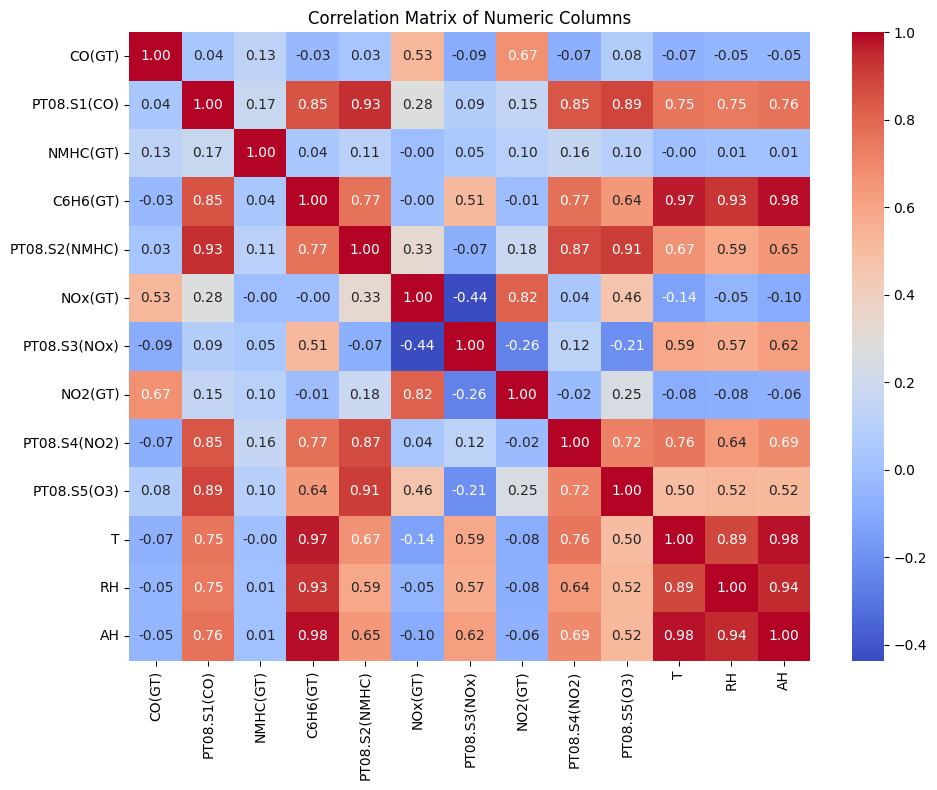

In [20]:
# Buat heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Columns')
plt.tight_layout()
# plt.savefig("correlation_heatmap.png")
plt.show()

In [21]:
#Next
numeric_df.corr()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
CO(GT),1.000000,0.041411,0.128351,-0.031378,0.029926,0.526451,-0.089981,0.671127,-0.073724,0.080310,-0.068939,-0.048227,-0.045892
PT08.S1(CO),0.041411,1.000000,0.170007,0.852687,0.933102,0.277993,0.087019,0.154030,0.845149,0.892434,0.754844,0.745375,0.764903
NMHC(GT),0.128351,0.170007,1.000000,0.037323,0.110104,-0.004427,0.048821,0.103307,0.162680,0.101185,-0.000009,0.008284,0.012500
C6H6(GT),-0.031378,0.852687,0.037323,1.000000,0.767433,-0.001174,0.512193,-0.010992,0.774673,0.641334,0.971375,0.925062,0.984555
PT08.S2(NMHC),0.029926,0.933102,0.110104,0.767433,1.000000,0.331272,-0.073667,0.176488,0.874782,0.909905,0.669025,0.585803,0.646572
NOx(GT),0.526451,0.277993,-0.004427,-0.001174,0.331272,1.000000,-0.436084,0.817139,0.035546,0.461889,-0.138452,-0.053009,-0.095847
PT08.S3(NOx),-0.089981,0.087019,0.048821,0.512193,-0.073667,-0.436084,1.000000,-0.256232,0.122734,-0.208865,0.588111,0.573549,0.621618
NO2(GT),0.671127,0.154030,0.103307,-0.010992,0.176488,0.817139,-0.256232,1.000000,-0.022174,0.253439,-0.084104,-0.081305,-0.060440
PT08.S4(NO2),-0.073724,0.845149,0.162680,0.774673,0.874782,0.035546,0.122734,-0.022174,1.000000,0.723690,0.755060,0.640707,0.691913
PT08.S5(O3),0.080310,0.892434,0.101185,0.641334,0.909905,0.461889,-0.208865,0.253439,0.723690,1.000000,0.503700,0.524955,0.519467


### Analyze Value -200

In [22]:
col1 = [
    'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
    'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
    'PT08.S5(O3)', 'T', 'RH', 'AH'
]

for cols in col1:
    print(f"Columns {cols} :")
    print(df[df[cols] == -200])

Columns CO(GT) :
           Date   Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
10   2004-03-11  04:00  -200.0       1011.0      14.0       1.3   
34   2004-03-12  04:00  -200.0        831.0      10.0       1.1   
39   2004-03-12  09:00  -200.0       1545.0    -200.0      22.1   
58   2004-03-13  04:00  -200.0       1147.0      56.0       6.2   
82   2004-03-14  04:00  -200.0       1130.0      56.0       5.2   
...         ...    ...     ...          ...       ...       ...   
9058 2005-03-23  04:00  -200.0        993.0    -200.0       2.3   
9130 2005-03-26  04:00  -200.0       1122.0    -200.0       6.0   
9202 2005-03-29  04:00  -200.0        883.0    -200.0       1.3   
9274 2005-04-01  04:00  -200.0        818.0    -200.0       0.8   
9346 2005-04-04  04:00  -200.0        864.0    -200.0       0.8   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
10            527.0     21.0        1818.0     34.0        1197.0   
34            506.0     21.0        1893

In [23]:
df[(df['NO2(GT)'] == -200) & (df['NOx(GT)'] == -200) & (df['NMHC(GT)'] == -200) & (df['CO(GT)'] == -200)]

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
39,2004-03-12,09:00,-200.0,1545.0,-200.0,22.1,1353.0,-200.0,767.0,-200.0,2058.0,1588.0,9.2,56.2,0.6561
568,2004-04-03,10:00,-200.0,1418.0,-200.0,11.2,1023.0,-200.0,785.0,-200.0,1720.0,1410.0,19.7,43.3,0.9837
569,2004-04-03,11:00,-200.0,1410.0,-200.0,11.4,1030.0,-200.0,781.0,-200.0,1743.0,1372.0,20.7,41.7,1.0092
570,2004-04-03,12:00,-200.0,1438.0,-200.0,13.4,1096.0,-200.0,781.0,-200.0,1779.0,1266.0,23.3,35.8,1.0098
571,2004-04-03,13:00,-200.0,1278.0,-200.0,10.6,1000.0,-200.0,866.0,-200.0,1621.0,1014.0,23.8,30.5,0.8897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7665,2005-01-24,03:00,-200.0,881.0,-200.0,1.9,578.0,-200.0,1017.0,-200.0,876.0,607.0,5.8,59.0,0.5493
7689,2005-01-25,03:00,-200.0,766.0,-200.0,0.3,412.0,-200.0,1651.0,-200.0,763.0,295.0,4.5,52.0,0.4436
7713,2005-01-26,03:00,-200.0,771.0,-200.0,0.3,410.0,-200.0,1622.0,-200.0,765.0,283.0,3.0,57.7,0.4423
7737,2005-01-27,03:00,-200.0,791.0,-200.0,0.8,480.0,-200.0,1259.0,-200.0,738.0,422.0,4.5,39.7,0.3379


In [24]:
# DROP Column NMHC(GT) cause the value cannot compatible with Model
df[df['NO2(GT)'] == -200].value_counts()

Date        Time   CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  T     RH    AH    
2004-03-11  03:00   0.6    1010.0        19.0     1.7       561.0          -200.0   1705.0        -200.0   1235.0        501.0        10.3  60.2  0.7517    1
2004-03-12  03:00   0.8    889.0         21.0     1.9       574.0          -200.0   1680.0        -200.0   1187.0        512.0        7.0   62.3  0.6261    1
            09:00  -200.0  1545.0       -200.0    22.1      1353.0         -200.0   767.0         -200.0   2058.0        1588.0       9.2   56.2  0.6561    1
2004-03-13  03:00   1.7    1172.0        46.0     5.4       783.0          -200.0   1179.0        -200.0   1380.0        996.0        7.8   67.5  0.7173    1
2004-03-14  03:00   2.4    1344.0        132.0    9.7       968.0          -200.0   921.0         -200.0   1620.0        1278.0       11.6  63.4  0.8674    1
                                                         

In [ ]:
df.sample(5)

### Copy Model & Create New DF

In [25]:
df_model = df.copy()

In [26]:
df_model.sample(5)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
4988,2004-10-04,14:00,-200.0,1188.0,-200.0,14.2,1124.0,-200.0,625.0,-200.0,1655.0,1094.0,27.1,40.2,1.4217
3174,2004-07-21,00:00,-200.0,1128.0,-200.0,10.0,978.0,92.0,733.0,89.0,1683.0,1193.0,28.3,36.8,1.3906
7796,2005-01-29,14:00,1.2,893.0,-200.0,3.0,653.0,152.0,987.0,102.0,845.0,550.0,3.4,46.6,0.3668
8977,2005-03-19,19:00,2.7,1360.0,-200.0,12.4,1063.0,387.0,507.0,183.0,1483.0,1420.0,16.2,53.0,0.9722
1675,2004-05-19,13:00,2.2,1233.0,-200.0,15.2,1154.0,116.0,746.0,115.0,1740.0,1000.0,31.0,22.9,1.0144


In [27]:
df_model.dtypes

Date             datetime64[ns]
Time                     object
CO(GT)                  float64
PT08.S1(CO)             float64
NMHC(GT)                float64
C6H6(GT)                float64
PT08.S2(NMHC)           float64
NOx(GT)                 float64
PT08.S3(NOx)            float64
NO2(GT)                 float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                       float64
RH                      float64
AH                      float64
dtype: object

In [28]:
### drop Value -200
df_model = df_model[df_model['T'] != -200]

In [29]:
# Not compatible with model
df_model = df_model.drop('NMHC(GT)', axis=1)

In [30]:
# DROP index terlebih dahulu
df_model.reset_index(drop=True, inplace=True)

#### Box Plot 'Temp'

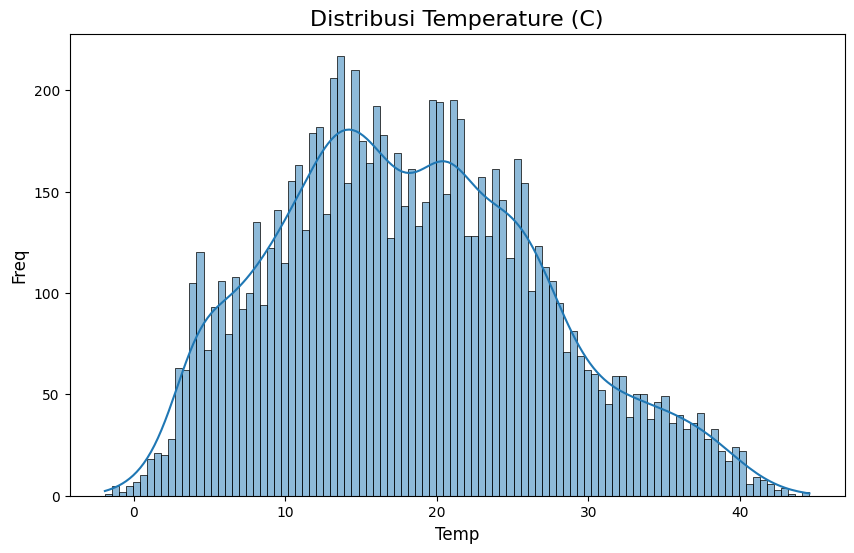

In [31]:
# Outlier Analysis
plt.figure(figsize=(10, 6))
sns.histplot(df_model['T'], bins=100, kde=True)  # bins= menentukan jumlah interval
plt.title('Distribusi Temperature (C)', fontsize=16)
plt.xlabel('Temp', fontsize=12)
plt.ylabel('Freq', fontsize=12)
plt.show()

In [32]:
df_model.sample(8)

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
8380,2005-03-10,03:00,1.1,1014.0,4.4,731.0,-200.0,784.0,-200.0,1062.0,1038.0,4.6,78.2,0.6684
2140,2004-06-09,15:00,1.8,1076.0,10.9,1012.0,113.0,894.0,116.0,1665.0,816.0,40.3,16.1,1.1896
63,2004-03-13,09:00,3.7,1408.0,15.1,1153.0,295.0,830.0,119.0,1777.0,1411.0,9.6,59.7,0.7124
362,2004-03-25,20:00,4.6,1389.0,21.6,1341.0,231.0,692.0,133.0,1982.0,1488.0,12.6,52.5,0.7642
5935,2004-11-19,05:00,0.9,863.0,1.3,531.0,45.0,1097.0,36.0,1095.0,606.0,14.7,59.8,0.9968
1761,2004-05-24,06:00,0.5,864.0,2.8,642.0,72.0,1288.0,69.0,1255.0,441.0,16.5,36.2,0.6752
4247,2004-09-09,20:00,3.6,1299.0,16.6,1197.0,407.0,763.0,165.0,1688.0,1606.0,29.3,30.7,1.2290
6132,2004-11-27,10:00,3.9,1492.0,17.8,1233.0,699.0,561.0,122.0,1672.0,1481.0,13.8,77.8,1.2201


#### Imputate Value -200

Since we have value '-200' in our dataset, we must imputate our value with bfill or ffill technique to create releveant Data

In [33]:
# Daftar kolom yang ingin diperbaiki
col_mod = ['CO(GT)', 'NOx(GT)', 'NO2(GT)']

# Ganti -200 dengan nilai NaN agar bisa diinterpolasi
df_model[col_mod] = df_model[col_mod].replace(-200, pd.NA)

# Konversi kolom ke tipe numerik (jika belum)
for col in col_mod:
    df_model[col] = pd.to_numeric(df_model[col], errors='coerce')

# Lakukan interpolasi linier (berdasarkan index, karena datanya urut waktu)
df_model[col_mod] = (df_model[col_mod].interpolate(method='linear')).round(3)

# Jika masih ada NaN di awal atau akhir, bisa gunakan fill
# df_model[col_mod] = df_model[col_mod].fillna(method='bfill').fillna(method='ffill') #past Code
df_model[col_mod] = df_model[col_mod].bfill().ffill()

#last method fill value with mean
df_model[col_mod] = df_model[col_mod].fillna(value=df_model[col_mod].mean())

In [ ]:
# df_model[(df_model['NO2(GT)'] == -200) & (df_model['NOx(GT)'] == -200) & (df_model['CO(GT)'] == -200)]

In [ ]:
# df_model[df_model['CO(GT)'] == -200]
# df_model.head(10)
df_model.loc[600:700]

#### Corr after Data Cleaning

In [34]:
nums_df= df_model.select_dtypes(['float64'])

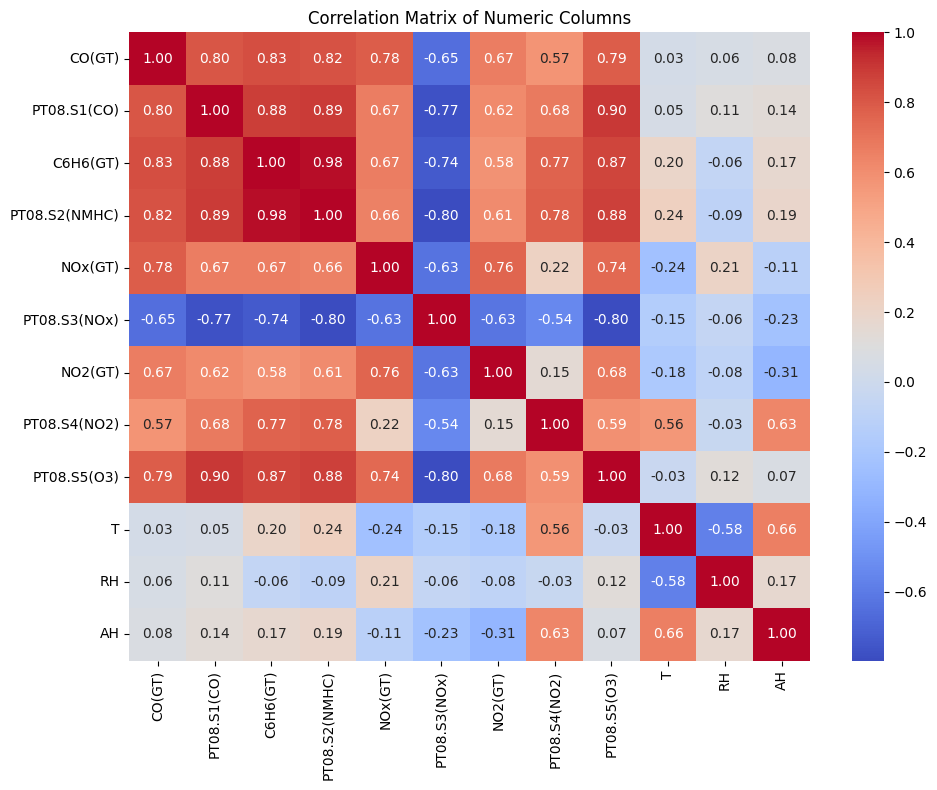

In [35]:
# Buat heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(nums_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Columns')
plt.tight_layout()
plt.show()

### Outlier Analysis after Cleaning

In [36]:
df_model.shape

(8991, 14)

In [37]:
df_model.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH'],
      dtype='object')

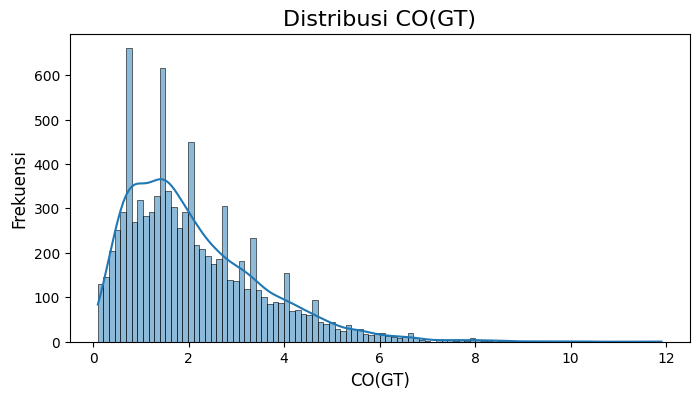

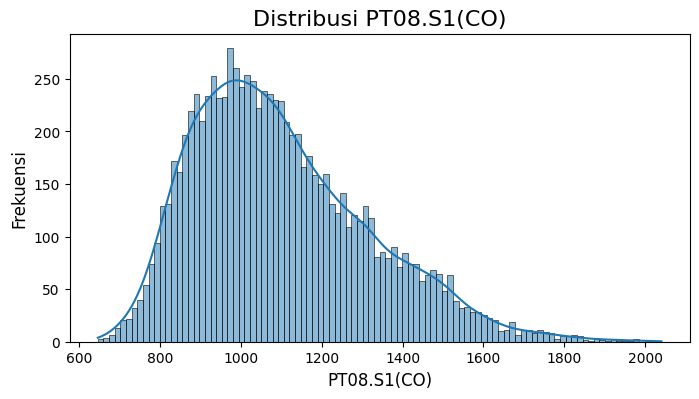

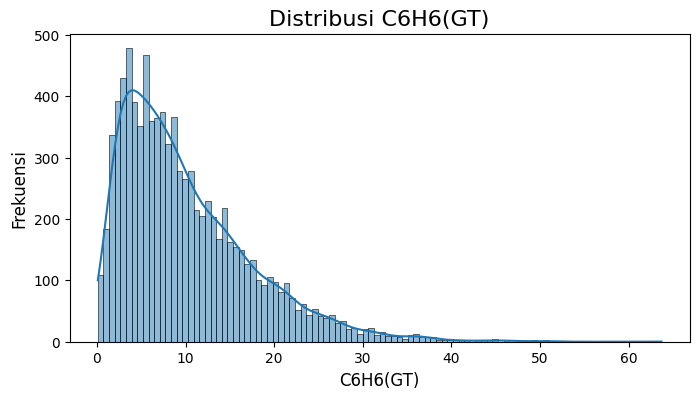

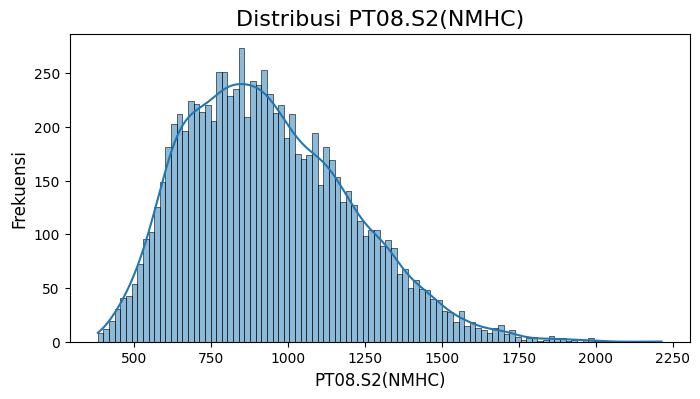

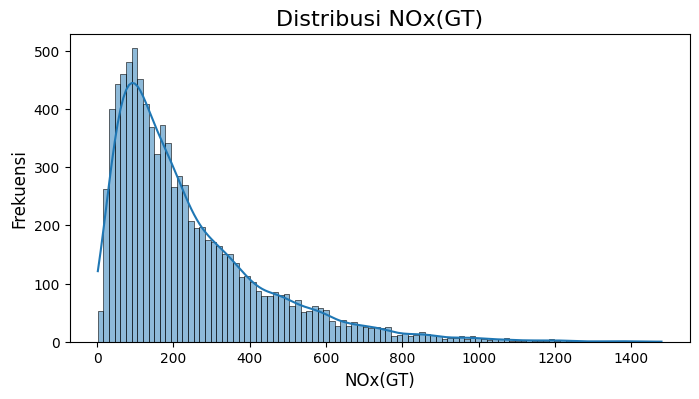

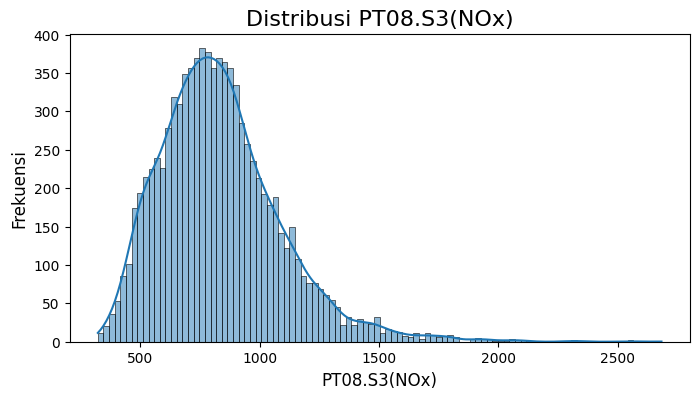

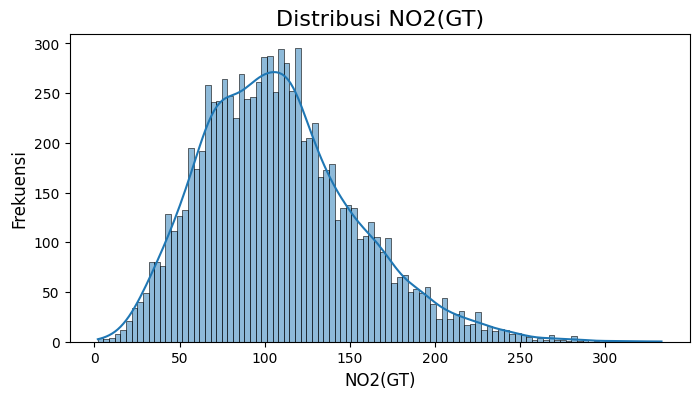

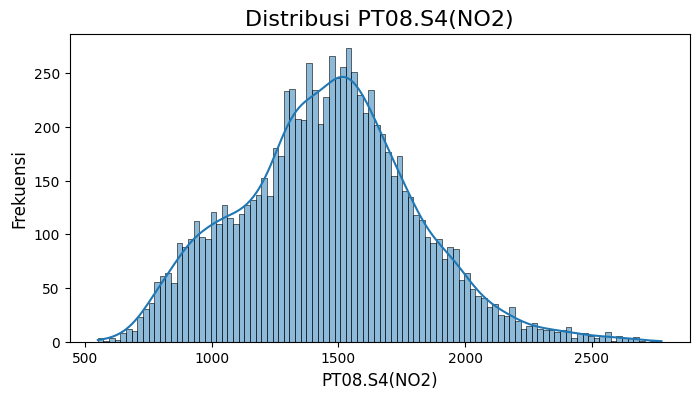

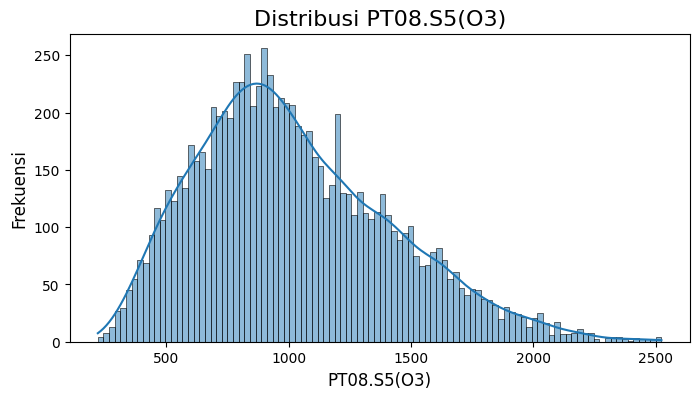

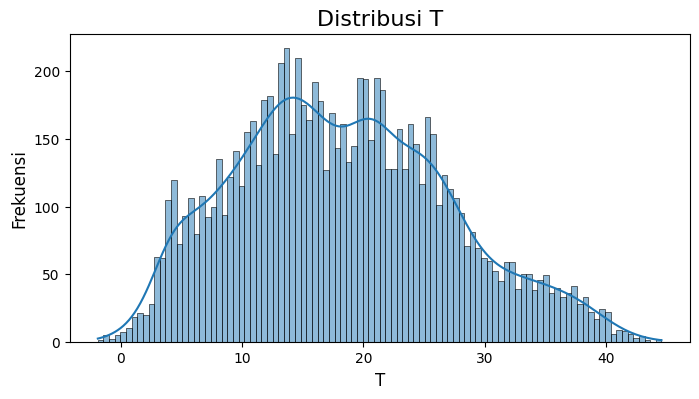

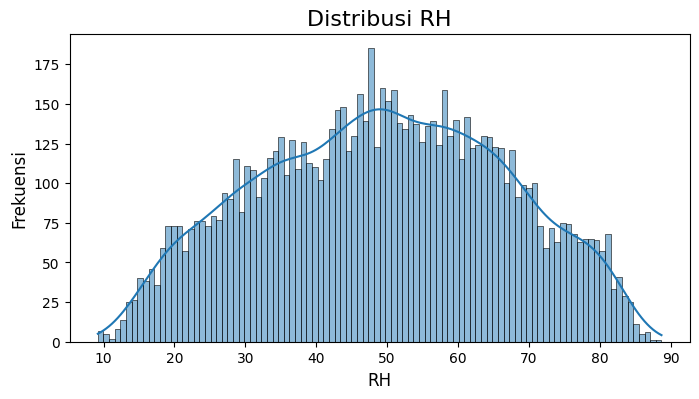

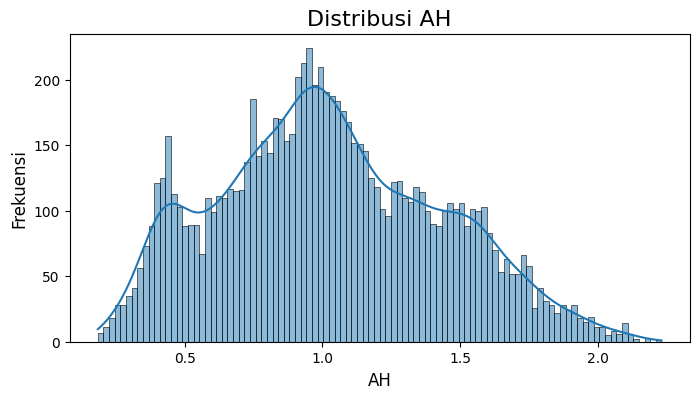

In [38]:
col_clean = ['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 
             'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
             'T', 'RH', 'AH']

for col in col_clean:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_model[col], bins=100, kde=True)
    plt.title(f'Distribusi {col}', fontsize=16)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frekuensi', fontsize=12)
    plt.show()

In [39]:
### I think have a outlier in CO Distribution
df_model['CO(GT)'].value_counts()

CO(GT)
0.800    371
1.000    290
1.400    269
1.500    268
1.600    265
        ... 
0.245      1
0.255      1
1.596      1
2.871      1
2.786      1
Name: count, Length: 1237, dtype: int64

### Z-Score

In [40]:
from scipy.stats import zscore

In [41]:
df_model['Z_CO'] = zscore(df_model['CO(GT)'])

In [45]:
df_model[['CO(GT)','Z_CO']].head()

,CO(GT),Z_CO
0,2.6,0.346465
1,2.0,-0.076591
2,2.2,0.064428
3,2.2,0.064428
4,1.6,-0.358629


In [46]:
# Menentukan outlier (nilai Z-Score > 3 atau < -3)
outliers = df_model[(df_model['Z_CO'] <= -3) | (df_model['Z_CO'] >= 3)]
print("Outliers Detected:\n", outliers)

Outliers Detected:
            Date   Time  CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
25   2004-03-11  19:00     6.9       1776.0      27.4         1488.0    383.0   
50   2004-03-12  20:00     6.6       1843.0      32.6         1610.0    340.0   
111  2004-03-15  09:00     8.1       1961.0      36.7         1701.0    478.0   
121  2004-03-15  19:00     8.0       2040.0      39.2         1754.0    404.0   
122  2004-03-15  20:00     6.5       1895.0      31.0         1573.0    320.0   
...         ...    ...     ...          ...       ...            ...      ...   
8492 2005-03-14  20:00     6.5       1639.0      28.3         1510.0    728.0   
8516 2005-03-15  20:00     7.4       1710.0      33.5         1632.0    841.0   
8659 2005-03-21  19:00     6.4       1609.0      29.7         1544.0    669.0   
8708 2005-03-23  20:00     7.2       1663.0      32.0         1597.0    874.0   
8732 2005-03-24  20:00     7.5       1818.0      35.5         1675.0    847.0   

      P

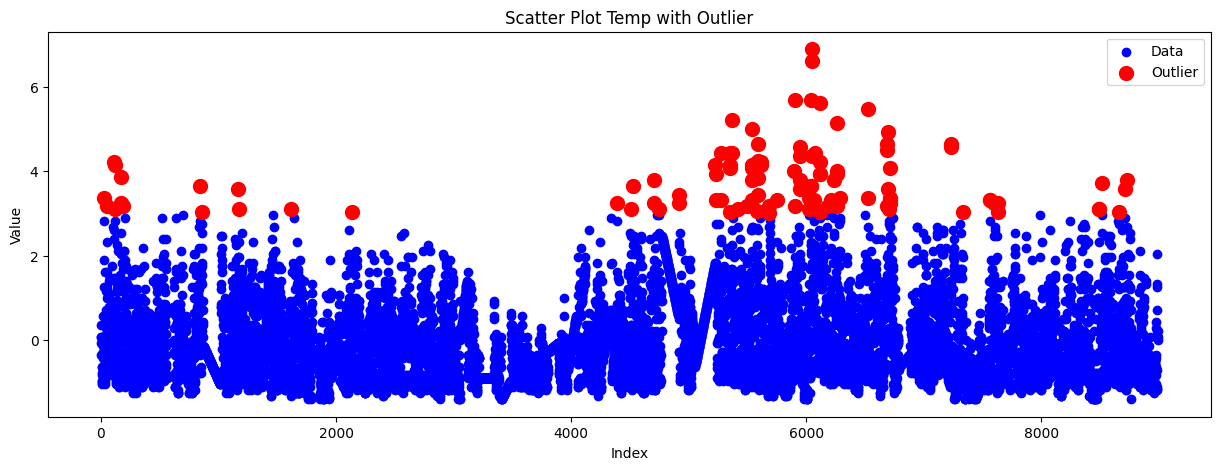

In [47]:
# Visualisasi menggunakan Scatter Plot
plt.figure(figsize=(15, 5))
plt.scatter(df_model.index, df_model['Z_CO'], label='Data', color='blue')

# Menambahkan outlier ke plot
plt.scatter(outliers.index, outliers['Z_CO'], color='red', label='Outlier', s=100)
plt.title('Scatter Plot Temp with Outlier')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

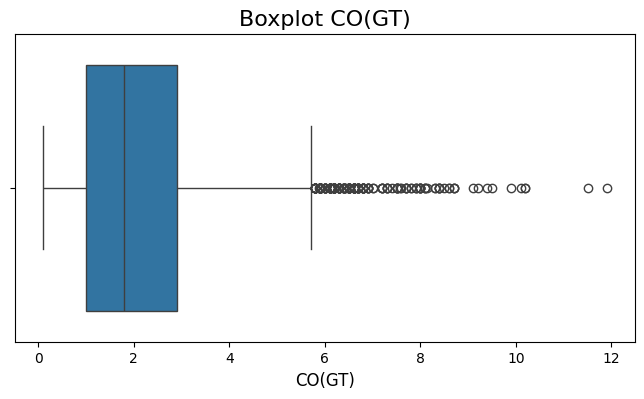

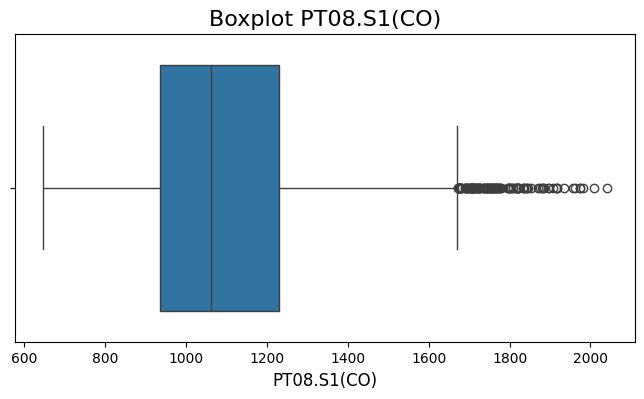

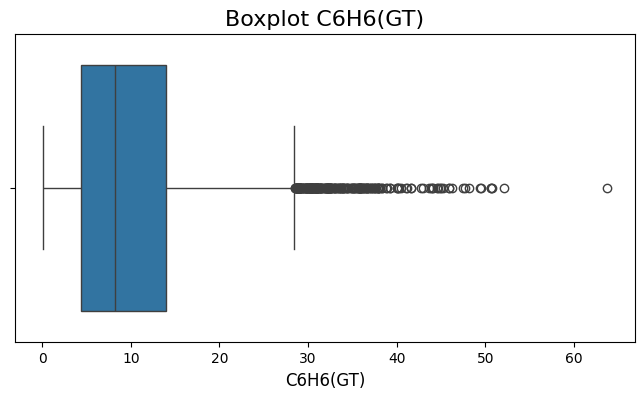

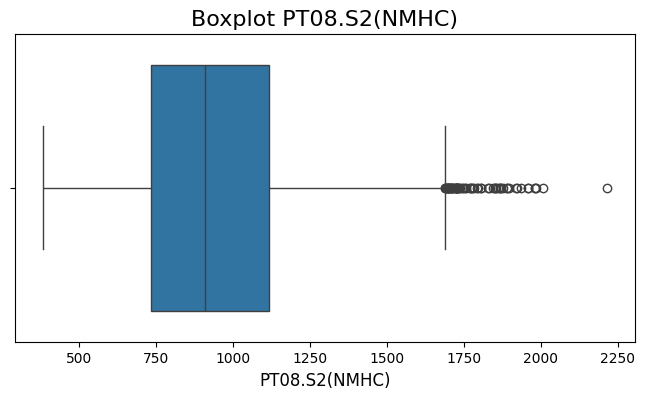

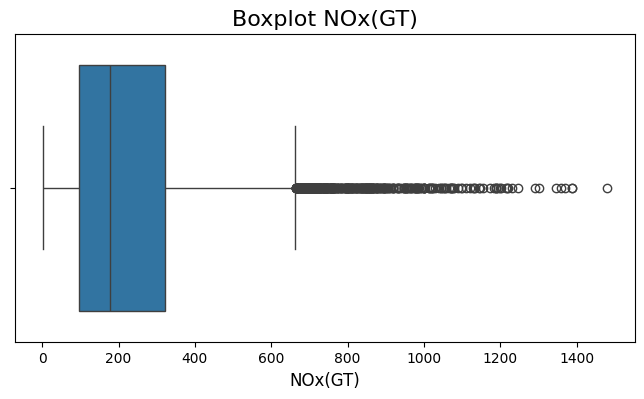

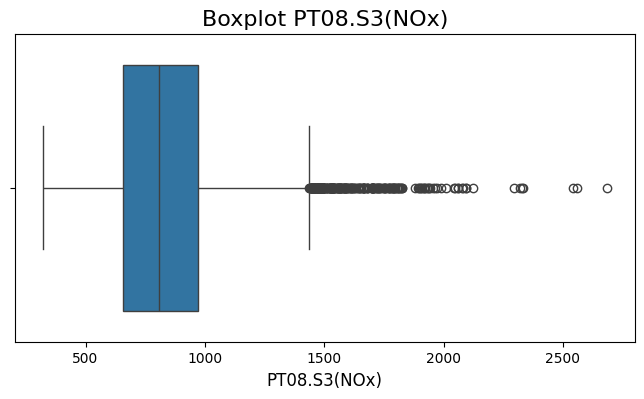

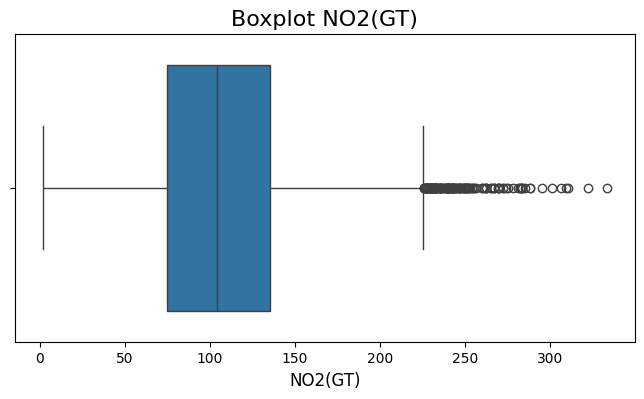

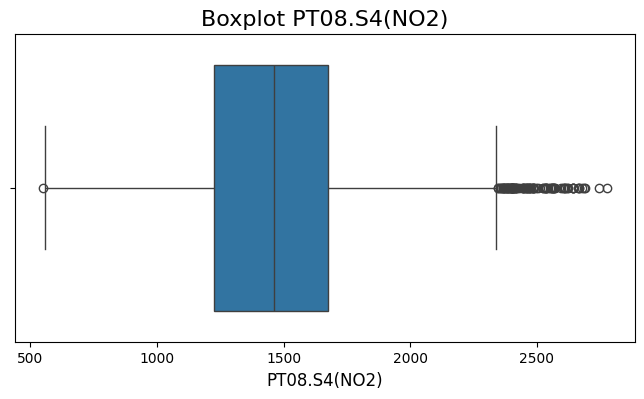

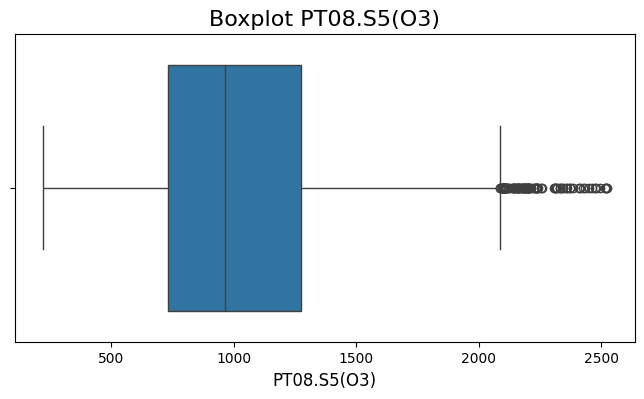

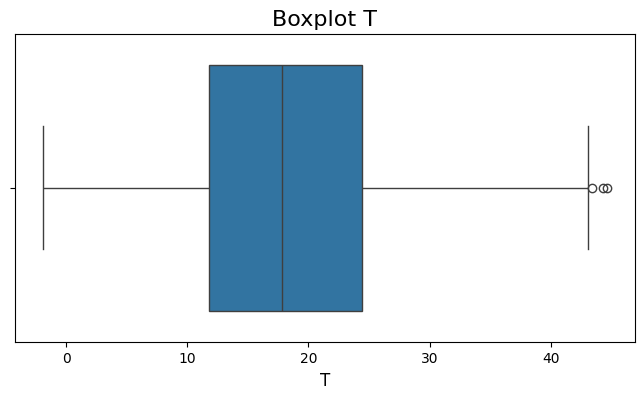

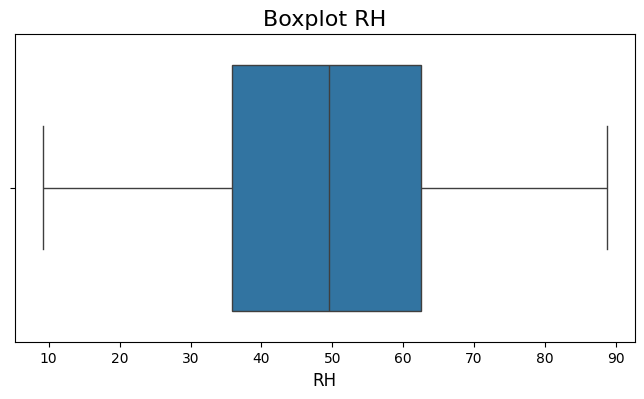

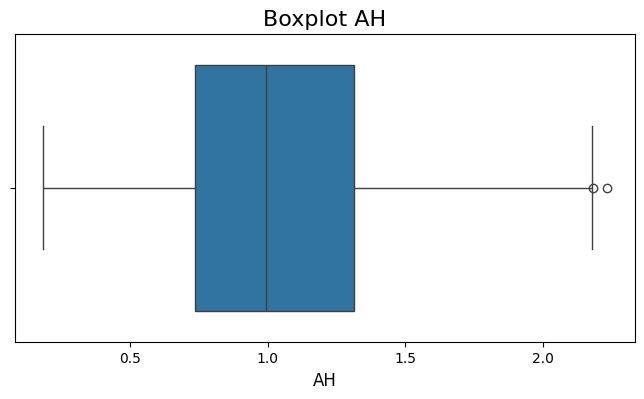

In [49]:
# Untuk setiap kolom di col_clean, buat boxplot
for col in col_clean:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_model[col])
    plt.title(f'Boxplot {col}', fontsize=16)
    plt.xlabel(col, fontsize=12)
    plt.show()